In [ ]:
# Import necessary libraries and modules

# pandas for data manipulation and analysis
import pandas as pd

# Surprise for building recommendation systems
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [ ]:
# Example exploration of the 'movies' dataframe
print(movies.head())
print(movies.info())

In [ ]:
# Example exploration of the 'ratings' dataframe
print(ratings.head())
print(ratings.info())


In [ ]:
# Example exploration of the 'tags' dataframe
print(tags.head())
print(tags.info())


In [ ]:
# Example exploration of the 'links' dataframe
print(links.head())
print(links.info())


In [ ]:
# Example: Datapreprocessing check for missing values in the 'movies' dataframe
print(movies.isnull().sum())

In [ ]:
print(ratings.isnull().sum())

In [ ]:
print(tags.isnull().sum())

In [ ]:
print(links.isnull().sum())

In [ ]:
# Merge 'ratings' and 'movies' dataframes on the 'movieId' column
movie_ratings = pd.merge(ratings, movies, on='movieId')

In [ ]:
# Inspect the Merged Dataframe
print(movie_ratings.head())  # Display the first few rows of the merged dataframe
print(movie_ratings.info())  # Provide information about columns and data types

In [ ]:
# Handling Missing Values
print(movie_ratings.isnull().sum())  # Check for missing values in the dataframe

In [ ]:
# User-Item Rating Matrix
user_item_matrix = movie_ratings.pivot_table(index='userId', columns='title', values='rating')
# Rows represent users, columns represent movies, and values are user ratings

In [ ]:
# Handling Missing Ratings (Optional)
user_item_matrix = user_item_matrix.fillna(0)  # Fill missing ratings with zeros


In [ ]:
# Converting to Surprise Dataset (Optional)
from surprise import Dataset, Reader

In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)


In [ ]:
# Data Splitting (Optional)
from surprise.model_selection import train_test_split

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
# Split the data for model training and evaluation

In [ ]:
# Import the SVD algorithm
from surprise import SVD

# Initialize the SVD algorithm
model = SVD()

# Train the model on the training dataset
model.fit(trainset)


In [ ]:
# Specify the User ID for which you want to make recommendations
user_id = 1  # Replace with the desired User ID

# Get a list of movie IDs that the user has not rated
user_movies = movie_ratings[movie_ratings['userId'] == user_id]['movieId']
movies_not_rated = movies[~movies['movieId'].isin(user_movies)]['movieId']

# Create a list of (movieId, predicted_rating) tuples for unrated movies
predicted_ratings = []
for movie_id in movies_not_rated:
    predicted_rating = model.predict(user_id, movie_id).est
    predicted_ratings.append((movie_id, predicted_rating))

# Sort the predicted ratings in descending order to recommend top-rated movies
recommended_movies = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)

# Print the top N recommended movies (change N as needed)
N = 10  # Number of recommendations to display
top_N_recommendations = recommended_movies[:N]

# Print the top N recommended movie titles
recommended_movie_titles = [movies[movies['movieId'] == movie_id]['title'].values[0] for movie_id, _ in top_N_recommendations]
for i, title in enumerate(recommended_movie_titles):
    print(f"Recommendation {i + 1}: {title}")


In [ ]:
!pip install tabulate

In [1]:
# Import necessary libraries
from tabulate import tabulate

# Create a list of movie recommendations
recommendations = [
    "Shawshank Redemption (1994)",
    "Ghost in the Shell (1995)",
    "Rear Window (1954)",
    "To Catch a Thief (1955)",
    "Cinema Paradiso (1989)",
    "Lawrence of Arabia (1962)",
    "To Kill a Mockingbird (1962)",
    "Raging Bull (1980)",
    "Chinatown (1974)",
    "Unforgiven (1992)"
]

# Display recommendations in a nicely formatted table
print(tabulate(enumerate(recommendations, start=1), headers=["Rank", "Movie"], tablefmt="pretty"))


+------+------------------------------+
| Rank |            Movie             |
+------+------------------------------+
|  1   | Shawshank Redemption (1994)  |
|  2   |  Ghost in the Shell (1995)   |
|  3   |      Rear Window (1954)      |
|  4   |   To Catch a Thief (1955)    |
|  5   |    Cinema Paradiso (1989)    |
|  6   |  Lawrence of Arabia (1962)   |
|  7   | To Kill a Mockingbird (1962) |
|  8   |      Raging Bull (1980)      |
|  9   |       Chinatown (1974)       |
|  10  |      Unforgiven (1992)       |
+------+------------------------------+


In [15]:
# Import necessary libraries
from IPython.display import Image, display, HTML

# List of movie poster URLs
poster_urls = [
    "https://m.media-amazon.com/images/S/pv-target-images/c5eea2f44626ddcbe2e5a4e3f37a36e05d7ca2ceb1690d795ca9ac38a8f5d365.jpg",
    "https://i.ytimg.com/vi/wSU2JH1_jWs/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLBxtdA6QCQTsoT2OaLnTMOkFRMoQA",
    "https://m.media-amazon.com/images/M/MV5BNGUxYWM3M2MtMGM3Mi00ZmRiLWE0NGQtZjE5ODI2OTJhNTU0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_.jpg",
    "https://flxt.tmsimg.com/assets/p539_p_v8_aa.jpg",
    "https://m.media-amazon.com/images/M/MV5BM2FhYjEyYmYtMDI1Yy00YTdlLWI2NWQtYmEzNzAxOGY1NjY2XkEyXkFqcGdeQXVyNTA3NTIyNDg@._V1_.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/c5/Lawrence_of_arabia_ver3_xxlg.jpg",
    "https://www.filmsite.org/posters/tokillamockingb.jpg",
    "https://boredanddangerousblog.files.wordpress.com/2015/11/bull-1.jpg",
    "https://m.media-amazon.com/images/M/MV5BMjJkMDZhYzItZTFhMi00ZGI4LThlNTAtZDNlYmEwNjFkNDYzXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_.jpg",
    "https://m.media-amazon.com/images/M/MV5BODM3YWY4NmQtN2Y3Ni00OTg0LWFhZGQtZWE3ZWY4MTJlOWU4XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_.jpg",
    # Add more poster URLs here
]

# Display movie posters alongside recommendations
for i, url in enumerate(poster_urls, start=1):
    display(Image(url=url, width=200, height=300), HTML(f"Recommendation {i}"))


In [27]:
import pandas as pd

# Load data (movies, ratings, tags, links) here

# Example:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

# Merge 'ratings' and 'movies' dataframes on the 'movieId' column
movie_ratings = pd.merge(ratings, movies, on='movieId')


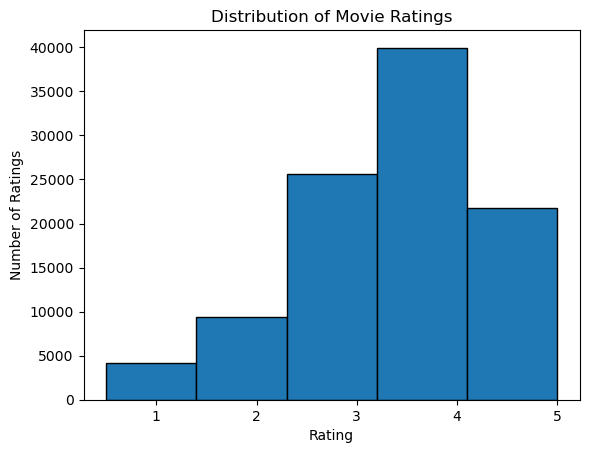

In [28]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'movie_ratings' with a 'rating' column
plt.hist(movie_ratings['rating'], bins=5, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Movie Ratings')
plt.show()


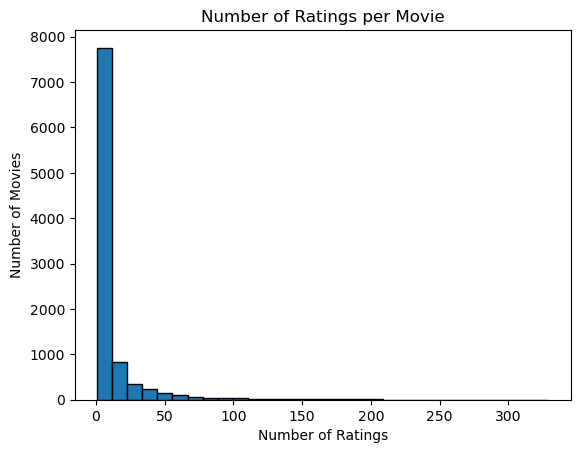

In [29]:
# Assuming you have a DataFrame called 'movie_ratings' with 'movieId' and 'rating' columns
ratings_per_movie = movie_ratings.groupby('movieId')['rating'].count()

plt.hist(ratings_per_movie, bins=30, edgecolor='k')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.title('Number of Ratings per Movie')
plt.show()


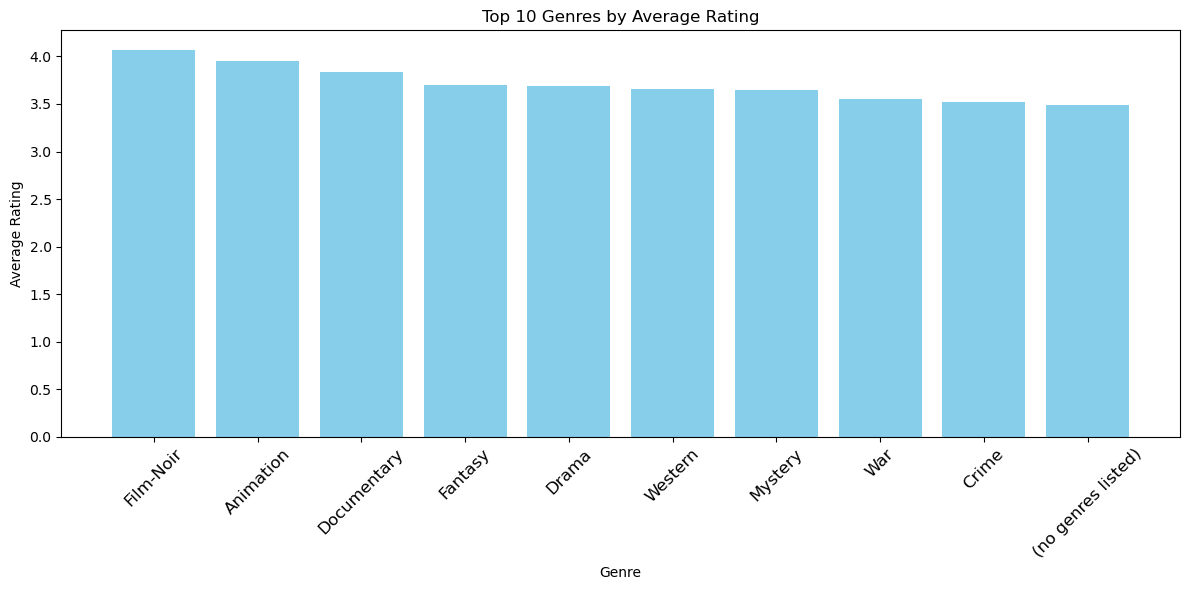

In [33]:
import matplotlib.pyplot as plt

# Group movies by genre and calculate the average rating for each genre
genre_ratings = movie_ratings.groupby('genres')['rating'].mean()

# Extract unique genres from the dataset
unique_genres = movie_ratings['genres'].str.split('|', expand=True).stack().unique()

# Initialize an empty dictionary to store genre ratings
genre_rating_dict = {}

# Calculate average ratings for each genre
for genre in unique_genres:
    genre_rating = genre_ratings.get(genre, 0)
    genre_rating_dict[genre] = genre_rating

# Sort genres by average rating
sorted_genres = dict(sorted(genre_rating_dict.items(), key=lambda item: item[1], reverse=True))

# Set the number of genres to display (e.g., top 10)
top_n = 10
top_genres = {k: v for k, v in list(sorted_genres.items())[:top_n]}

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(top_genres.keys(), top_genres.values(), color='skyblue')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_title('Top {} Genres by Average Rating'.format(top_n))
ax.tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()
